---

# **Sobre** | Balanceamento de dados e Previsões
---

Esse projeto é uma atividade fornecida por a plataforma de estudos ExpertAcademy e tem como desafio prever a confiança dos usuários com dados de traços de personalidade extraidos em textos. Durante a visualização foi encontrado uma descrepancia na igualdade dos dados, foi feito um processamento de balanceamento e alcançado um total de 80% de precisão

# Tópicos

* ETL 
* RandomForestClassifier
* Under-Sampling
* Over-Sampling

### ETL (Extração - Tratamento - Limpeza)

In [117]:
import pandas as pd
import numpy as np 
import random


* Base de dados fornecida pela ExpertAcademy

In [118]:
data = 'csv_result-ebay_confianca_completo.csv'
df = pd.read_csv(f'{data}')

In [119]:
df.shape

(5806, 75)

In [120]:
df.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


* convertendo a unica coluna que não esta em typagem numerica para bool


In [121]:
df['blacklist'] = df['blacklist'] == 'S'

* visualizando descrepancia nos dados de treinamento

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


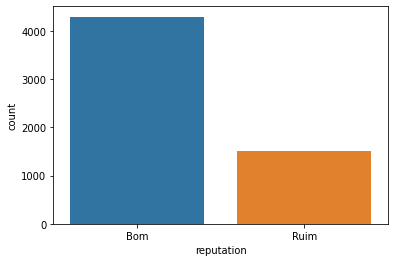

In [122]:
import seaborn as sns
sns.countplot(df['reputation']);

* Separando dados de treinamento

In [123]:
X = df.iloc[:,0:74].values

In [124]:
X

array([[0, 49, False, ..., 0.6400725899947721, 0.598037041554872,
        0.828716381071851],
       [0, 56, False, ..., 0.6444645861342442, 0.603041772443901,
        0.8093789692710098],
       [0, 50, False, ..., 0.6554697130298307, 0.6450420335022421,
        0.82603890125472],
       ...,
       [78, 0, False, ..., 0.6974661634054785, 0.6739035045452172,
        0.8320726536961992],
       [95, 0, False, ..., 0.7706773179699052, 0.7100477615788761,
        0.8199238314070743],
       [53, 0, False, ..., 0.6239306346573744, 0.6331205213003834,
        0.7920921058167003]], dtype=object)

In [125]:
y = df.iloc[:,74].values

In [126]:
y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object)

In [127]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

* Modelo de treinamento

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify = y)

In [130]:
X_treinamento.shape, y_treinamento.shape

((4644, 74), (4644,))

In [131]:
X_teste.shape, y_teste.shape

((1162, 74), (1162,))

### RandomForestClassifier

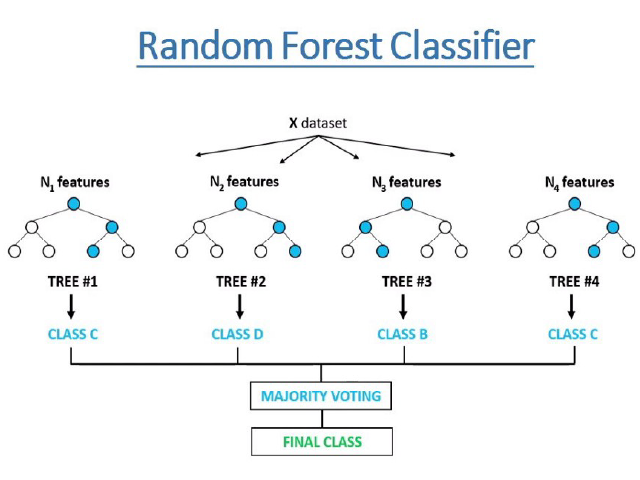

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
modelo = RandomForestClassifier()
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [134]:
previsoes = modelo.predict(X_teste)

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste) 

0.7452667814113597

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
confusion_matrix(previsoes, y_teste)

array([[855, 291],
       [  5,  11]])

In [161]:
usuarios_r = 11 / (11 + 5)
print(f'Taxa de acerto da classe usuário_ruim {round(usuarios_r, 2)}%')

Taxa de acerto da classe usuário_ruim 0.69%


In [163]:
usuarios_b = 855 / (855 + 291)
print(f'Taxa de acerto da classe usuário_bom {round(usuarios_b, 2)}%')

Taxa de acerto da classe usuário_bom 0.75%


### Sub-amostragem (undersampling) - tomek links


* TomekLInks

TomekLinks será útil para lidar com a classe majority (maioria), será feito uma comparação dos dados mais proximos presentes na amostragem e será apagado os dados que estão fazendo parte da maioria

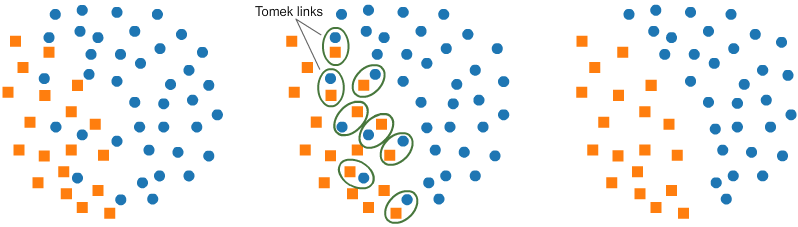

In [140]:
from imblearn.under_sampling import TomekLinks

In [141]:
tl = TomekLinks(sampling_strategy='majority')

* Repetindo o procedimento com a subamostragem original

In [142]:
X_under, y_under = tl.fit_resample(X, y)

In [143]:
X_under.shape, y_under.shape

((5417, 74), (5417,))

#### Comparando o resultado da nova subamostragem

* original

In [144]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

* Tomeklinks

In [145]:
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507]))

* Treinamento

In [146]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under) 

In [147]:
X_treinamento_u.shape, X_teste_u.shape

((4333, 74), (1084, 74))

In [148]:
modelo_u = RandomForestClassifier()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.731549815498155

### Sobre-amostragem (oversampling) - Smote


* Smote

O smote irá enriquecer sinteticamente a amostragem menor presente na base de treino, até que ambas estejam equivalentes

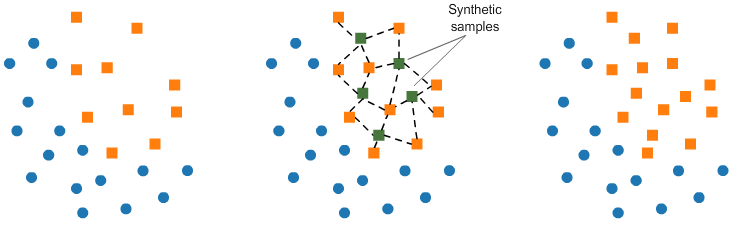

In [149]:
from imblearn.over_sampling import SMOTE

In [150]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

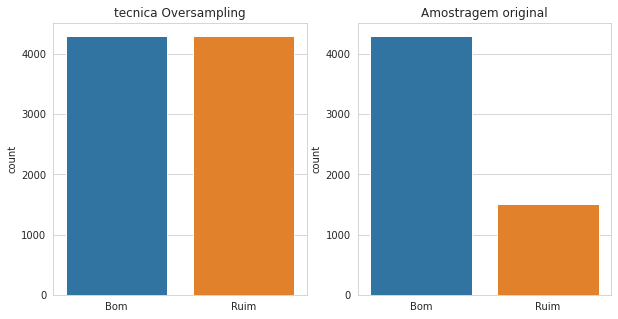

In [151]:
from seaborn.rcmod import axes_style
import matplotlib.pyplot as plt


with axes_style('whitegrid'):
  fig, axs = plt.subplots(ncols=2, figsize=(10,5))
  sns.countplot(x=y_over, ax=axs[0])
  sns.countplot(x=y, ax=axs[1])

  axs[0].set_title('tecnica Oversampling')
  axs[1].set_title('Amostragem original')

In [152]:
X_over.shape, y_over.shape

((8598, 74), (8598,))

#### Comparando novo resultado da sobre-amostragem 

* Original

In [153]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

* Smote

In [154]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

* Treinamento 

In [155]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over) 

In [156]:
X_treinamento_o.shape, X_teste_o.shape

((6878, 74), (1720, 74))

In [157]:
modelo_o = RandomForestClassifier()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.8034883720930233

* Confusion matrix

In [158]:
confusion_matrix(previsoes_o, y_teste_o)

array([[690, 168],
       [170, 692]])

In [164]:
usuarios_b_o = 690 / (690 + 168)
print(f'Taxa de acerto da nova classe usuário_bom {round(usuarios_b_o, 3)}%')

Taxa de acerto da nova classe usuário_bom 0.804%


In [165]:
usuarios_r_o = 692 / (692 + 170)
print(f'Taxa de acerto da nova classe usuário_ruim {round(usuarios_r_o, 3)}%')

Taxa de acerto da nova classe usuário_ruim 0.803%
